# College Application Case Study

## Step 1

### Question: Are there systematic differences in the six-year graduation rate of college students by race?

### Target Variable: grad_150_rate/grad_100_rate

### Independent Business Metric: If studies find that certain racial groups have lower graduation rates, should colleges adjust their admissions strategies, such as offering more targeted academic support programs to improve graduation rates for those groups?

## Step 2

### Read the Dataset

In [355]:
import pandas as pd
df1 = pd.read_csv('cc_state_sector_grads.csv')
print(df1.head())

   index  stateid    state state_abbr             control   level  year  \
0      0        1  Alabama         AL  Private for-profit  4-year  2011   
1      1        1  Alabama         AL  Private for-profit  4-year  2011   
2      2        1  Alabama         AL  Private for-profit  4-year  2011   
3      3        1  Alabama         AL  Private for-profit  4-year  2011   
4      4        1  Alabama         AL  Private for-profit  4-year  2011   

  gender race   cohort  grad_cohort  grad_100  grad_150  grad_100_rate  \
0      B    A  4y bach            0       0.0         0            NaN   
1      B   Ai  4y bach            1       0.0         0            0.0   
2      B    B  4y bach           51       2.0         3            3.9   
3      B    H  4y bach            1       0.0         0            0.0   
4      B    W  4y bach           66      15.0        18           22.7   

   grad_150_rate  grad_cohort_ct  
0            NaN               9  
1            0.0               9  

### Delete the useless variable and transformation

In [356]:
df1.info()
Column_index_list = [4,5,8,9] #column用[]
df1.iloc[:,Column_index_list]= df1.iloc[:,Column_index_list].astype('category') #转换为category
df1.drop(columns=['index', 'stateid', 'state', 'state_abbr', 'grad_100', 'grad_150', 'cohort', 'grad_cohort_ct', 'grad_cohort'], inplace=True) #删除掉没有用的variables
df1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84942 entries, 0 to 84941
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           84942 non-null  int64  
 1   stateid         84942 non-null  int64  
 2   state           84942 non-null  object 
 3   state_abbr      84942 non-null  object 
 4   control         84942 non-null  object 
 5   level           84942 non-null  object 
 6   year            84942 non-null  int64  
 7   gender          84942 non-null  object 
 8   race            84942 non-null  object 
 9   cohort          84942 non-null  object 
 10  grad_cohort     84942 non-null  int64  
 11  grad_100        31760 non-null  float64
 12  grad_150        84942 non-null  int64  
 13  grad_100_rate   30033 non-null  float64
 14  grad_150_rate   75623 non-null  float64
 15  grad_cohort_ct  84942 non-null  int64  
dtypes: float64(3), int64(6), object(7)
memory usage: 10.4+ MB


,control,level,year,gender,race,grad_100_rate,grad_150_rate
0,Private for-profit,4-year,2011,B,A,NaN,NaN
1,Private for-profit,4-year,2011,B,Ai,0.0,0.0
2,Private for-profit,4-year,2011,B,B,3.9,5.9
3,Private for-profit,4-year,2011,B,H,0.0,0.0
4,Private for-profit,4-year,2011,B,W,22.7,27.3
...,...,...,...,...,...,...,...
84937,Public,2-year,2013,M,Ai,NaN,12.9
84938,Public,2-year,2013,M,B,NaN,10.5
84939,Public,2-year,2013,M,H,NaN,15.1
84940,Public,2-year,2013,M,W,NaN,21.8


In [357]:
df1.race.value_counts()

race
A     14157
Ai    14157
B     14157
H     14157
W     14157
X     14157
Name: count, dtype: int64

In [358]:
df1.gender.value_counts()

gender
B    28314
F    28314
M    28314
Name: count, dtype: int64

In [359]:
df1.year.value_counts()

year
2011    7578
2012    7578
2013    7578
2010    7290
2008    7272
2007    7218
2005    7128
2004    7128
2006    7110
2003    6966
2002    6912
2009    5184
Name: count, dtype: int64

In [360]:
df1.level.value_counts()

level
4-year    58770
2-year    26172
Name: count, dtype: int64

In [361]:
df1.control.value_counts()

control
Public                    31374
Private for-profit        26856
Private not-for-profit    26712
Name: count, dtype: int64

In [362]:
df1

,control,level,year,gender,race,grad_100_rate,grad_150_rate
0,Private for-profit,4-year,2011,B,A,NaN,NaN
1,Private for-profit,4-year,2011,B,Ai,0.0,0.0
2,Private for-profit,4-year,2011,B,B,3.9,5.9
3,Private for-profit,4-year,2011,B,H,0.0,0.0
4,Private for-profit,4-year,2011,B,W,22.7,27.3
...,...,...,...,...,...,...,...
84937,Public,2-year,2013,M,Ai,NaN,12.9
84938,Public,2-year,2013,M,B,NaN,10.5
84939,Public,2-year,2013,M,H,NaN,15.1
84940,Public,2-year,2013,M,W,NaN,21.8


### Fill NaN value

In [363]:
df1['grad_100_rate'] = df1['grad_100_rate'].fillna(df1['grad_100_rate'].median())
df1['grad_150_rate'] = df1['grad_150_rate'].fillna(df1['grad_150_rate'].median())
df1['year'] = df1['year'].fillna(df1['year'].median())

### Standardization

In [364]:
from sklearn.preprocessing import StandardScaler
scale_features = ['grad_100_rate', 'grad_150_rate','year'] #年份可以不用分类
scaler = StandardScaler()
df1[scale_features] = scaler.fit_transform(df1[scale_features]) #都压缩在同一个区间
print(df1.head())

              control   level     year gender race  grad_100_rate  \
0  Private for-profit  4-year  0.98447      B    A      -0.072914   
1  Private for-profit  4-year  0.98447      B   Ai      -2.240319   
2  Private for-profit  4-year  0.98447      B    B      -1.912688   
3  Private for-profit  4-year  0.98447      B    H      -2.240319   
4  Private for-profit  4-year  0.98447      B    W      -0.333339   

   grad_150_rate  
0      -0.000997  
1      -1.696612  
2      -1.442700  
3      -1.696612  
4      -0.521731  


In [365]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[['grad_100_rate', 'grad_150_rate','year']] = scaler.fit_transform(df1[['grad_100_rate', 'grad_150_rate','year']]) #在0-1
df1


,control,level,year,gender,race,grad_100_rate,grad_150_rate
0,Private for-profit,4-year,0.818182,B,A,0.258,0.394
1,Private for-profit,4-year,0.818182,B,Ai,0.000,0.000
2,Private for-profit,4-year,0.818182,B,B,0.039,0.059
3,Private for-profit,4-year,0.818182,B,H,0.000,0.000
4,Private for-profit,4-year,0.818182,B,W,0.227,0.273
...,...,...,...,...,...,...,...
84937,Public,2-year,1.000000,M,Ai,0.258,0.129
84938,Public,2-year,1.000000,M,B,0.258,0.105
84939,Public,2-year,1.000000,M,H,0.258,0.151
84940,Public,2-year,1.000000,M,W,0.258,0.218


### One-hot 

In [366]:

encode_cols = ['gender', 'race', 'level', 'control']
df1 = pd.get_dummies(df1, columns=encode_cols, drop_first=False) #进行one-hot
df1 = df1.fillna(0)
one_hot_columns = [col for col in df1.columns if any(prefix in col for prefix in ['gender_', 'race_', 'level_', 'control_'])] #选择所有one-hot列
df1[one_hot_columns] = df1[one_hot_columns].astype(int)
df1




,year,grad_100_rate,grad_150_rate,gender_B,gender_F,gender_M,race_A,race_Ai,race_B,race_H,race_W,race_X,level_2-year,level_4-year,control_Private for-profit,control_Private not-for-profit,control_Public
0,0.818182,0.258,0.394,1,0,0,1,0,0,0,0,0,0,1,1,0,0
1,0.818182,0.000,0.000,1,0,0,0,1,0,0,0,0,0,1,1,0,0
2,0.818182,0.039,0.059,1,0,0,0,0,1,0,0,0,0,1,1,0,0
3,0.818182,0.000,0.000,1,0,0,0,0,0,1,0,0,0,1,1,0,0
4,0.818182,0.227,0.273,1,0,0,0,0,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84937,1.000000,0.258,0.129,0,0,1,0,1,0,0,0,0,1,0,0,0,1
84938,1.000000,0.258,0.105,0,0,1,0,0,1,0,0,0,1,0,0,0,1
84939,1.000000,0.258,0.151,0,0,1,0,0,0,1,0,0,1,0,0,0,1
84940,1.000000,0.258,0.218,0,0,1,0,0,0,0,1,0,1,0,0,0,1


### Baseline/Prevalence

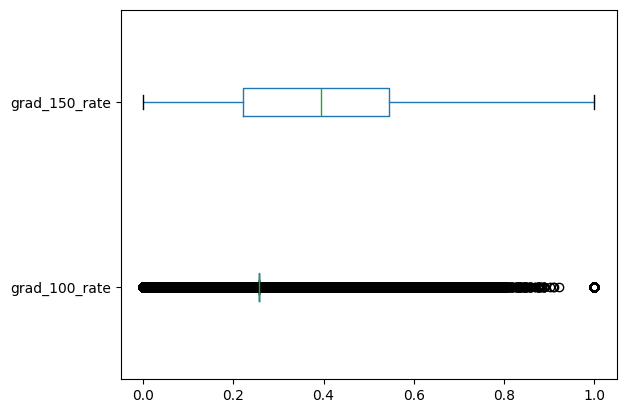

In [367]:
import matplotlib.pyplot as plt
df1.boxplot(column=['grad_100_rate', 'grad_150_rate'], vert=False, grid=False) #画箱型图，看分布情况
plt.show()

In [368]:
df1[['grad_100_rate', 'grad_150_rate']].describe() #why the grad_100_rate is so concentrate????
#一般选择Q2，但是可以根据目标问题改变


,grad_100_rate,grad_150_rate
count,84942.000000,84942.000000
mean,0.266679,0.394232
std,0.119037,0.232365
min,0.000000,0.000000
25%,0.258000,0.222000
50%,0.258000,0.394000
75%,0.258000,0.545000
max,1.000000,1.000000


In [369]:
df1["grad_100_f"] = pd.cut(df1["grad_100_rate"], bins=[-1, 0.258, 1], labels=[0, 1])# pick the Q3 is the cut line
df1["grad_150_f"] = pd.cut(df1["grad_150_rate"], bins=[-1, 0.545, 1], labels=[0, 1])
df1["grad_100_f"] = df1["grad_100_f"].fillna(0).astype(int)
df1["grad_150_f"] = df1["grad_150_f"].fillna(0).astype(int) #convert to numerical and then fill the null again
print(df1[["grad_100_rate", "grad_100_f", "grad_150_rate", "grad_150_f"]].head())

   grad_100_rate  grad_100_f  grad_150_rate  grad_150_f
0          0.258           1          0.394           0
1          0.000           0          0.000           0
2          0.039           0          0.059           0
3          0.000           0          0.000           0
4          0.227           0          0.273           0


In [370]:
prevalence100 = df1["grad_100_f"].mean()
prevalence150 = df1["grad_150_f"].mean()
print(prevalence_100,prevalence_150)  #calculate the prevalence

0.8213133667679122 0.24788679334133878


### Partitioning

In [371]:
Drop = ['grad_100_rate', 'grad_150_rate']
df1 = df1.drop(columns=(Drop)) #Drop the old columns

In [372]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df1, test_size=0.3, stratify=df1["grad_150_f"], random_state=42) #对 test/train进行分类，test30%，train70%
print(train.shape)

(59459, 17)


In [373]:
Tune, Test = train_test_split(test,  train_size = 0.5, stratify= test.grad_150_f)
print(Tune.shape) #create the Tune group(15%)

(12741, 17)


In [374]:
print(train.grad_150_f.value_counts())
print(14739/59459) #same rate on train group

grad_150_f
0    44720
1    14739
Name: count, dtype: int64
0.24788509729393363


In [375]:
print(Tune.grad_150_f.value_counts())
print(3158/12741) #same rate on Tune group

grad_150_f
0    9583
1    3158
Name: count, dtype: int64
0.24786123538183816


## Step 3:
My data only addresses the six-year graduation rate in the question and does not simulate the four-year graduation scenario. Upon analyzing the four-year graduation data, I found that the data points are highly concentrated at a single value, with Q1, Q2, and Q3 all being the same. As a result, the four-year graduation data was not included in the analysis. This omission may lead to an inaccurate response to the business metric and could potentially impact the overall reliability of the conclusions.

# Case Study

## Step 1:
### Question：Do MBA grades (mba_p) affect the likelihood of MBA graduates getting well-paying jobs?
### Independent Business Metric：What percentage of MBA graduates have high paying jobs (e.g., salaries above Q2)?
### Target Variable：High Salary （dichotomy）



## Step 2

### Read the Dataset

In [376]:
import pandas as pd
df2 = pd.read_csv('https://raw.githubusercontent.com/DG1606/CMS-R-2020/master/Placement_Data_Full_Class.csv')
print(df2.head())

   sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0      1      M  67.00   Others  91.00   Others  Commerce     58.00   
1      2      M  79.33  Central  78.33   Others   Science     77.48   
2      3      M  65.00  Central  68.00  Central      Arts     64.00   
3      4      M  56.00  Central  52.00  Central   Science     52.00   
4      5      M  85.80  Central  73.60  Central  Commerce     73.30   

    degree_t workex  etest_p specialisation  mba_p      status    salary  
0   Sci&Tech     No     55.0         Mkt&HR  58.80      Placed  270000.0  
1   Sci&Tech    Yes     86.5        Mkt&Fin  66.28      Placed  200000.0  
2  Comm&Mgmt     No     75.0        Mkt&Fin  57.80      Placed  250000.0  
3   Sci&Tech     No     66.0         Mkt&HR  59.43  Not Placed       NaN  
4  Comm&Mgmt     No     96.8        Mkt&Fin  55.50      Placed  425000.0  


### Delete the useless variables, and transformation

In [377]:
df2.drop(columns=['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t'], inplace=True)
df2.info()
Column_index_list = [2,4,6] 
df2.iloc[:,Column_index_list]= df2.iloc[:,Column_index_list].astype('category') 
df2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   hsc_p           215 non-null    float64
 1   degree_p        215 non-null    float64
 2   workex          215 non-null    object 
 3   etest_p         215 non-null    float64
 4   specialisation  215 non-null    object 
 5   mba_p           215 non-null    float64
 6   status          215 non-null    object 
 7   salary          148 non-null    float64
dtypes: float64(5), object(3)
memory usage: 13.6+ KB


,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status,salary
0,91.00,58.00,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,78.33,77.48,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,68.00,64.00,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,52.00,52.00,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,73.60,73.30,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...
210,82.00,77.60,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,60.00,72.00,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,67.00,73.00,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,66.00,58.00,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [378]:
df2.workex.value_counts()

workex
No     141
Yes     74
Name: count, dtype: int64

In [379]:
df2.specialisation.value_counts()

specialisation
Mkt&Fin    120
Mkt&HR      95
Name: count, dtype: int64

In [380]:
df2.status.value_counts()

status
Placed        148
Not Placed     67
Name: count, dtype: int64

### Deal with the Numerical Variable

### fill the NaN

In [381]:
df2['hsc_p'] = df2['hsc_p'].fillna(df2['hsc_p'].median())
df2['degree_p'] = df2['degree_p'].fillna(df2['degree_p'].median())
df2['etest_p'] = df2['etest_p'].fillna(df2['etest_p'].median())
df2['salary'] = df2['salary'].fillna(df2['salary'].median())
df2['mba_p'] = df2['mba_p'].fillna(df2['mba_p'].median())

### Standardization

In [382]:
from sklearn.preprocessing import StandardScaler
scale_features2 = ['hsc_p', 'degree_p', 'etest_p', 'mba_p'] #年份可以不用分类
scaler = StandardScaler()
df2[scale_features2] = scaler.fit_transform(df2[scale_features2]) #都压缩在同一个区间
df2

,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status,salary
0,2.268812,-1.140102,No,-1.291091,Mkt&HR,-0.597647,Placed,270000.0
1,1.103448,1.513267,Yes,1.087157,Mkt&Fin,0.687620,Placed,200000.0
2,0.153313,-0.322843,No,0.218908,Mkt&Fin,-0.769474,Placed,250000.0
3,-1.318339,-1.957362,No,-0.460592,Mkt&HR,-0.489396,Not Placed,265000.0
4,0.668391,0.943909,No,1.864806,Mkt&Fin,-1.164676,Placed,425000.0
...,...,...,...,...,...,...,...,...
210,1.441008,1.529612,No,1.426906,Mkt&Fin,2.098321,Placed,400000.0
211,-0.582513,0.766836,No,0.143408,Mkt&Fin,-1.487711,Placed,275000.0
212,0.061335,0.903046,Yes,-0.989091,Mkt&Fin,1.278706,Placed,295000.0
213,-0.030644,-1.140102,No,-0.158592,Mkt&HR,-0.351934,Placed,204000.0


### MINMAX scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[['hsc_p', 'degree_p', 'etest_p', 'mba_p']] = scaler.fit_transform(df2[['hsc_p', 'degree_p', 'etest_p', 'mba_p']]) #在0-1，target variable不用在这里处理
df2

,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status,salary
0,0.889621,0.195122,No,0.104167,Mkt&HR,0.284483,Placed,270000.0
1,0.680890,0.670244,Yes,0.760417,Mkt&Fin,0.564843,Placed,200000.0
2,0.510708,0.341463,No,0.520833,Mkt&Fin,0.247001,Placed,250000.0
3,0.247117,0.048780,No,0.333333,Mkt&HR,0.308096,Not Placed,265000.0
4,0.602965,0.568293,No,0.975000,Mkt&Fin,0.160795,Placed,425000.0
...,...,...,...,...,...,...,...,...
210,0.741351,0.673171,No,0.854167,Mkt&Fin,0.872564,Placed,400000.0
211,0.378913,0.536585,No,0.500000,Mkt&Fin,0.090330,Placed,275000.0
212,0.494234,0.560976,Yes,0.187500,Mkt&Fin,0.693778,Placed,295000.0
213,0.477759,0.195122,No,0.416667,Mkt&HR,0.338081,Placed,204000.0


### One-hot encoding

In [384]:
encode_cols2 = ['workex', 'specialisation', 'status']
df2 = pd.get_dummies(df2, columns=encode_cols2, drop_first=False) #进行one-hot
df2 = df2.fillna(0)
one_hot_columns2 = [col for col in df2.columns if any(prefix in col for prefix in ['workex', 'specialisation', 'status'])] #选择所有one-hot列
df2[one_hot_columns2] = df2[one_hot_columns2].astype(int)
df2

,hsc_p,degree_p,etest_p,mba_p,salary,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR,status_Not Placed,status_Placed
0,0.889621,0.195122,0.104167,0.284483,270000.0,1,0,0,1,0,1
1,0.680890,0.670244,0.760417,0.564843,200000.0,0,1,1,0,0,1
2,0.510708,0.341463,0.520833,0.247001,250000.0,1,0,1,0,0,1
3,0.247117,0.048780,0.333333,0.308096,265000.0,1,0,0,1,1,0
4,0.602965,0.568293,0.975000,0.160795,425000.0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
210,0.741351,0.673171,0.854167,0.872564,400000.0,1,0,1,0,0,1
211,0.378913,0.536585,0.500000,0.090330,275000.0,1,0,1,0,0,1
212,0.494234,0.560976,0.187500,0.693778,295000.0,0,1,1,0,0,1
213,0.477759,0.195122,0.416667,0.338081,204000.0,1,0,0,1,0,1


### Baseline/Prevalence

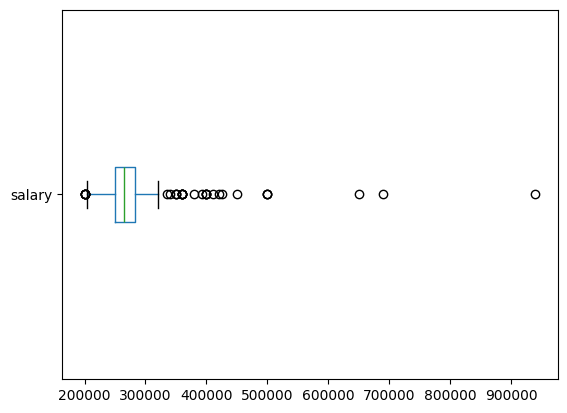

In [385]:
import matplotlib.pyplot as plt
df2.boxplot(column=['salary'], vert=False, grid=False) # 在classification中，对于target variable，不用进行转化，直接最后进行cutting就可以
plt.show()

In [386]:
df2[['salary']].describe()

,salary
count,215.000000
mean,281283.720930
std,78232.510303
min,200000.000000
25%,250000.000000
50%,265000.000000
75%,282500.000000
max,940000.000000


In [387]:
df2['high_salary'] = (df2['salary'] > 265000).astype(int)
df2['salary_new'] = pd.cut(df2['salary'], bins=[0, 265000, float('inf')], labels=[0, 1]) #在classification model中，可以对target variable进行多组处理吗
df2["salary_new"] = df2["salary_new"].fillna(0).astype(int)
df2


,hsc_p,degree_p,etest_p,mba_p,salary,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR,status_Not Placed,status_Placed,high_salary,salary_new
0,0.889621,0.195122,0.104167,0.284483,270000.0,1,0,0,1,0,1,1,1
1,0.680890,0.670244,0.760417,0.564843,200000.0,0,1,1,0,0,1,0,0
2,0.510708,0.341463,0.520833,0.247001,250000.0,1,0,1,0,0,1,0,0
3,0.247117,0.048780,0.333333,0.308096,265000.0,1,0,0,1,1,0,0,0
4,0.602965,0.568293,0.975000,0.160795,425000.0,1,0,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,0.741351,0.673171,0.854167,0.872564,400000.0,1,0,1,0,0,1,1,1
211,0.378913,0.536585,0.500000,0.090330,275000.0,1,0,1,0,0,1,1,1
212,0.494234,0.560976,0.187500,0.693778,295000.0,0,1,1,0,0,1,1,1
213,0.477759,0.195122,0.416667,0.338081,204000.0,1,0,0,1,0,1,0,0


In [388]:
prevalence2 = df2["salary_new"].mean()
print(prevalence2) #与下面的值不一样，或许没有处理NaN，在计算中生出一些NaN

0.3209302325581395


### Partitioning

In [389]:
df2 = df2.drop(columns=(['salary']))

In [390]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df2, test_size=0.3, stratify=df2["salary_new"], random_state=42) #对 test/train进行分类，test30%，train70%
print(train.shape)

(150, 12)


In [391]:
Tune, Test = train_test_split(test,  train_size = 0.5, stratify= test.salary_new)
print(Tune.shape)

(32, 12)


In [392]:
print(train.salary_new.value_counts())
print(48/102)

salary_new
0    102
1     48
Name: count, dtype: int64
0.47058823529411764


In [393]:
print(Tune.salary_new.value_counts())
print(10/22)

salary_new
0    22
1    10
Name: count, dtype: int64
0.45454545454545453


## Step 3:
I don’t know why the prevalence value differs between my Tune and Train groups. I suspect it might be due to NaN values affecting the calculation.

At the same time, I have another question: My target variable is salary, and I am working on a classification model. Instead of using a binary classification, can I categorize the target variable into multiple groups? Will this affect the model training later on?
